<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/FrequencyDomain/Frequency_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

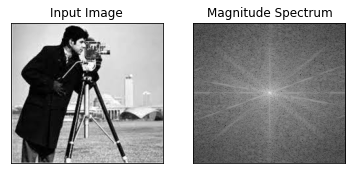

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img = cv.imread('/content/man.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

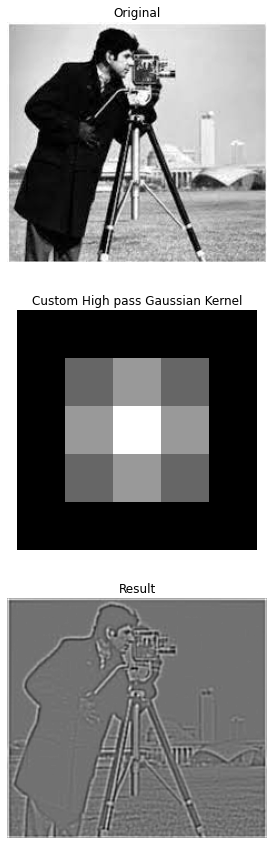

In [44]:
from scipy import misc
from scipy import signal

kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])

blurred = signal.fftconvolve(img, kernel, mode='same')

fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1,
                                                     figsize=(6, 15))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Custom High pass Gaussian Kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Result')
ax_blurred.set_axis_off()
fig.show()

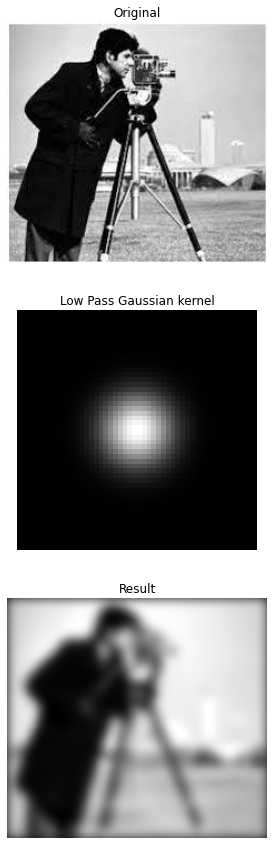

In [45]:

kernel = np.outer(signal.windows.gaussian(50, 5),
                  signal.windows.gaussian(50, 5))
blurred = signal.fftconvolve(img, kernel, mode='same')

fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1,
                                                     figsize=(6, 15))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Low Pass Gaussian kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Result')
ax_blurred.set_axis_off()
fig.show()

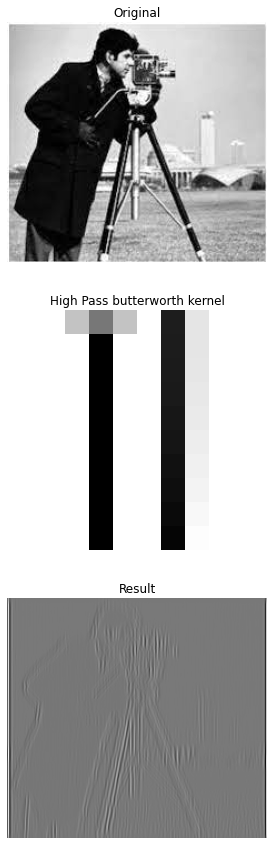

In [61]:
sos = signal.butter(20, 30, 'highpass', fs=1000, output='sos')
result = signal.fftconvolve(img, sos, mode='same')

fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1,
                                                     figsize=(6, 15))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(sos, cmap='gray')
ax_kernel.set_title('High Pass butterworth kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(result, cmap='gray')
ax_blurred.set_title('Result')
ax_blurred.set_axis_off()
fig.show()

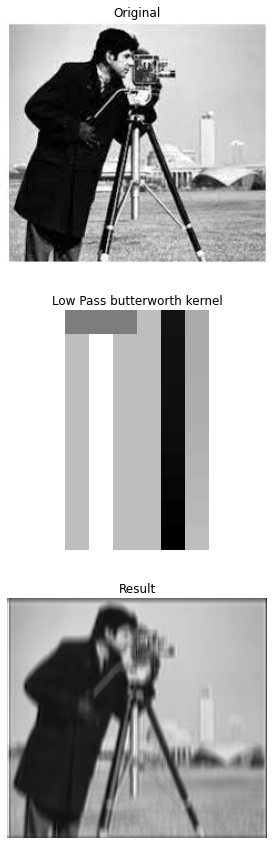

In [62]:
sos = signal.butter(20, 30, 'lowpass', fs=1000, output='sos')
result = signal.fftconvolve(img, sos, mode='same')

fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1,
                                                     figsize=(6, 15))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(sos, cmap='gray')
ax_kernel.set_title('Low Pass butterworth kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(result, cmap='gray')
ax_blurred.set_title('Result')
ax_blurred.set_axis_off()
fig.show()